**Team:** Akash Bose, Dmitry Chudinovskikh

# PROJECT 2 - Houston Crime Data Exploration

Why Houston? - Houston has been my home for the last few years and I am very passionate about the city. The city has a lot to offer but like any other big city it isn't above crime, and as such you should reserve your judgement simply based on the exploration presented in this notebook. 

Why crime? - It was the most interetsing set of data in the list. We weren't too passionate about mulicipality reports or zoning and decide to explore crime. 

Having lived in Houston, I can tell you the areas to avoid - 3rd and 4th ward (the usual - south side). But let's explore this data and see what we find.

* Anecdote: I actually lived in red building at the bottom left corner of the tall tower (William's Tower). 

![Houston](https://raw.githubusercontent.com/bosea3000/Project-02/master/Houston.jpg)

# Part-1 (Examine the data) 

The csv file used here has been modified from the original source data available at: http://www.houstontx.gov/police/cs/index-2.htm

Modification Steps:
1. Download all availble (.xls) files for 2016 from the website and save it as file1, file2, ...., etc.
2. Open each individual file and save-as (.csv UTF-8)
       --> Alternatively, you could use in2csv command in the csvtoolkit package.
3. Combine the separate files into one - See code in the markdown below 
4. Once combined, we open the merged csv and filter out ALL the non-2016 values and DELETE. Don't forget to SAVE. 
       --> We are only interested in 2016 crime. The files somehow contained few data points from 1985,86..,etc.

*Now we have final file ready for export using the wget command 

- !csvcut file1.csv | head -1 > crimeData.csv (To get the header and put into a new file)
- !tail -n +2 -q file*.csv >> crimeData.csv (To get every row EXCEPT the header and append to the new file)

In [1]:
!wget https://raw.githubusercontent.com/bosea3000/Project-02/master/crimeData.csv

--2016-11-11 16:54:32--  https://raw.githubusercontent.com/bosea3000/Project-02/master/crimeData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6526245 (6.2M) [text/plain]
Saving to: ‘crimeData.csv’

crimeData.csv       100%[=====================>]   6.22M  --.-KB/s   in 0.08s  

2016-11-11 16:54:32 (80.3 MB/s) - ‘crimeData.csv’ saved [6526245/6526245]



### Basic exploration using csvkit

In [2]:
!wc -l crimeData.csv

86769 crimeData.csv


##### Let's look at the header line and see what we are dealing with

In [3]:
!csvcut crimeData.csv | head -1 | csvlook

|-------+------+--------------+------+---------+------------+------------+------+--------+------------------|
|  Date | Hour | Offense_Type | Beat | Premise | BlockRange | StreetName | Type | Suffix | Number_Offenses  |
|-------+------+--------------+------+---------+------------+------------+------+--------+------------------|


##### Essentially, the same function as the code above but more direct and tabular

In [4]:
!csvcut -n crimeData.csv

  1: Date
  2: Hour
  3: Offense_Type
  4: Beat
  5: Premise
  6: BlockRange
  7: StreetName
  8: Type
  9: Suffix
 10: Number_Offenses


##### Let's see what are the TYPES of crimes reported in this data set

In [5]:
!csvcut -c3 crimeData.csv | sort | uniq 

1
Aggravated Assault
Auto Theft
Burglary
Murder
Offense_Type
Rape
Robbery
Theft


##### We see 2 entries that are questionable: 
1. Offense_Type is the header  
2. "1"is probably a typo

##### This is to see which entry has only been recorded ONCE. 

In [6]:
!csvcut -c3 crimeData.csv | sort | uniq -u

Offense_Type


And it's the header

##### Let's now count each TYPE of crime in 2016. 

In [7]:
!csvcut -c3 crimeData.csv | sort | uniq -c | sort

  13134 Burglary
      1 Offense_Type
      2 1
    213 Murder
  48659 Theft
    692 Rape
   7273 Robbery
   7844 Aggravated Assault
   8952 Auto Theft


##### That's a LOT of crime!! ~50,000 Thefts and ~13,000 Burglaries in just 9 months alone! 

##### You can also use the 'grep' command to do a specific search. Here we search for murder and count the total number

In [8]:
!csvcut crimeData.csv | grep -o 'Murder'| wc -l 

213


##### The city of Houston has divided up the city into subdivision and each subdivision has a code associated with it, as shown below. 

In [9]:
!csvcut -c4 crimeData.csv | sort | uniq -d | sort | head -5

10H10
10H20
10H30
10H40
10H50


##### Let's explore the subdivisions column and see the top-5 crime hot-spots

In [10]:
!csvstat -c4 crimeData.csv

  4. Beat
	<class 'str'>
	Nulls: False
	Unique values: 118
	5 most frequent values:
		1A20:	2078
		12D10:	1844
		19G10:	1741
		6B60:	1629
		2A50:	1621
	Max length: 8

Row count: 86769


###### Let's also explore the distribution of the Number of Occurrances column

In [11]:
!csvcut -c10 crimeData.csv | sort | uniq -c

  85262 1
      1 10
   1276 2
    163 3
     46 4
     14 5
      5 6
      1 7
      1 8
      1 Number_Offenses


### What about NULL values? 
We can explore more using csvstat

##### Dimension - Time

In [12]:
!csvstat -c1,2 crimeData.csv

  1. Date
	<class 'datetime.date'>
	Nulls: False
	Min: 2016-01-01
	Max: 2016-09-30
	Unique values: 274
	5 most frequent values:
		2016-05-18:	395
		2016-09-15:	392
		2016-06-21:	386
		2016-09-02:	385
		2016-04-15:	384
  2. Hour
	<class 'int'>
	Nulls: False
	Min: 0
	Max: 23
	Sum: 1120363
	Mean: 12.912019269554795
	Median: 13
	Standard Deviation: 5.918223575936074
	Unique values: 24
	5 most frequent values:
		15:	5407
		16:	5257
		14:	5091
		13:	4930
		11:	4867

Row count: 86769


##### Dimension - Offense

In [13]:
!csvstat -c3 crimeData.csv

  3. Offense_Type
	<class 'str'>
	Nulls: False
	Unique values: 8
	5 most frequent values:
		Theft:	48659
		Burglary:	13134
		Auto Theft:	8952
		Aggravated Assault:	7844
		Robbery:	7273
	Max length: 18

Row count: 86769


##### Dimension - Location

In [14]:
!csvstat -c4,5,6,7,8,9 crimeData.csv

  4. Beat
	<class 'str'>
	Nulls: False
	Unique values: 118
	5 most frequent values:
		1A20:	2078
		12D10:	1844
		19G10:	1741
		6B60:	1629
		2A50:	1621
	Max length: 8
  5. Premise
	<class 'str'>
	Nulls: True
	Unique values: 125
	5 most frequent values:
		Residence or House:	11945
		Apartment Parking Lot:	9961
		Road, Street, or Sidewalk:	9083
		Apartment:	8318
		Restaurant or Cafeteria Parking Lot:	3927
	Max length: 42
  6. BlockRange
	<class 'str'>
	Nulls: False
	Unique values: 233
	5 most frequent values:
		100-199:	1193
		2300-2399:	1178
		900-999:	1101
		800-899:	1066
		300-399:	1055
	Max length: 13
  7. StreetName
	<class 'str'>
	Nulls: False
	Unique values: 6887
	5 most frequent values:
		WESTHEIMER:	2660
		GULF:	1321
		SAM HOUSTON:	1309
		RICHMOND:	1238
		KATY:	1225
	Max length: 31
  8. Type
	<class 'str'>
	Nulls: False
	Unique values: 27
	5 most frequent values:
		-:	19540
		DR:	18333
		ST:	15181
		RD:	13156
		FWY:	6263
	Max length: 4
  9. Suffix
	<class 'str'>
	Nulls: False
	Va

##### Dimension - Measure of Offenses

In [15]:
!csvstat -c10 crimeData.csv

 10. Number_Offenses
	<class 'int'>
	Nulls: False
	Min: 1
	Max: 10
	Sum: 88612
	Mean: 1.0212403047171226
	Median: 1
	Standard Deviation: 0.18020919917067071
	Unique values: 9
	5 most frequent values:
		1:	85262
		2:	1276
		3:	163
		4:	46
		5:	14

Row count: 86769


### Questions?
1. What type of crime is most frequent in 2016?
2. What areas are affected the most?
3. What is the trend of total crime each month in 2016?
4. What time of day (in hour) do we see spikes in crime? 
5. What's the worst street to be on a holiday - (Let's say 4th of July)?

# Part 2 - (Setting Database and SQL Queries)

In [16]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [17]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [18]:
!createdb -U dbuser Project

In [19]:
%sql postgresql://dbuser@localhost:5432/Project

'Connected: dbuser@Project'

### Creating the Table - Crime

In [20]:
%%sql
DROP TABLE IF EXISTS Crime;
CREATE TABLE Crime (
    Date TIMESTAMP(0),
    Hour CHAR(4),
    Offense_Type VARCHAR(42),
    Beat VARCHAR(20),
    Premise VARCHAR(64),
    BlockRange VARCHAR(20),
    StreetName VARCHAR(64),
    Type VARCHAR(16),
    Suffix VARCHAR(12),
    Number_offenses INT
    
);

Done.
Done.


[]

##### Loading our final (.csv) file into the database

In [21]:
%%sql
COPY Crime 
FROM '/home/jovyan/work/crimeData.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

86769 rows affected.


[]

##### Sanity check?!

In [22]:
%%sql 
SELECT COUNT(*) 
FROM Crime;

1 rows affected.


count
86769


In [23]:
%%sql 
ALTER TABLE Crime
ADD COLUMN Crime_id SERIAL PRIMARY
KEY;

Done.


[]

In [24]:
%%sql
SELECT * 
FROM Crime
LIMIT 5

5 rows affected.


date,hour,offense_type,beat,premise,blockrange,streetname,type,suffix,number_offenses,crime_id
2016-01-01 00:00:00,10,Burglary,10H10,Restaurant or Cafeteria,300-399,LOCKWOOD,DR,S,1,1
2016-01-01 00:00:00,23,Theft,10H30,"Road, Street, or Sidewalk",1000-1099,BASTROP,ST,-,1,2
2016-01-01 00:00:00,18,Aggravated Assault,10H40,"Road, Street, or Sidewalk",1700-1799,ELGIN,ST,-,2,3
2016-01-01 00:00:00,18,Auto Theft,10H40,Other Parking Lot,3000-3099,TRAVIS,-,-,1,4
2016-01-01 00:00:00,2,Burglary,10H40,Grocery Store or Supermarket,4200-4299,SAN JACINTO,-,-,1,5


##### Phew! We passed!

### Time for some Queries

##### Question 1:  What type of crime is most frequent in 2016?

Notice the Query below. We asked the same question in part 1 using the csvtoolkit but having a visual aid really transforms the perception of the data in question. The most common cirme is - Theft. 

In [25]:
%%sql
SELECT DISTINCT OFFENSE_TYPE, COUNT(*)
FROM Crime
GROUP BY OFFENSE_TYPE
ORDER BY COUNT(*)

8 rows affected.


offense_type,count
1,2
Murder,213
Rape,692
Robbery,7273
Aggravated Assault,7844
Auto Theft,8952
Burglary,13134
Theft,48659


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Offense Type Distribution


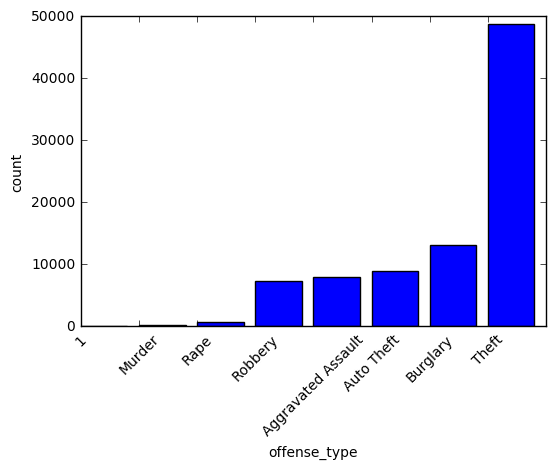

In [26]:
import matplotlib
%matplotlib inline 

q1_results = _
q1_results.bar()
!echo 'Offense Type Distribution'

##### I added the csv command below for a quick comparison 

In [27]:
!csvcut -c3 crimeData.csv | sort | uniq -c | sort

  13134 Burglary
      1 Offense_Type
      2 1
    213 Murder
  48659 Theft
    692 Rape
   7273 Robbery
   7844 Aggravated Assault
   8952 Auto Theft


##### Question 2: What areas are affected the most?

In [28]:
%%sql
SELECT DISTINCT BEAT, COUNT(*)
FROM Crime
GROUP BY BEAT
ORDER BY COUNT(*)
LIMIT 10;

10 rows affected.


beat,count
21I70,1
UH-3P,3
21I30,10
21I40,13
21I60,39
13D30,72
23J50,78
24C40,84
24C60,106
1A40,144


Location of Crime (Beat) Distribution


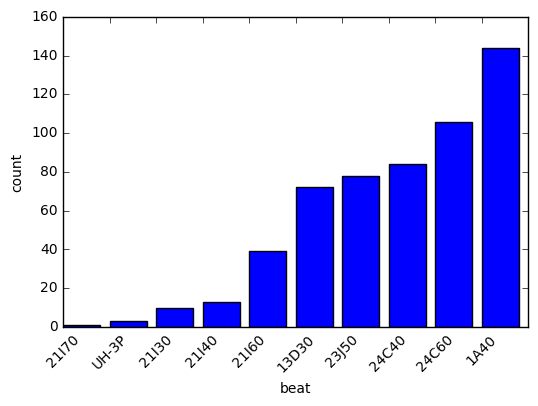

In [29]:
%matplotlib inline 

q1_results = _
q1_results.bar()
!echo 'Location of Crime (Beat) Distribution'

Now this may not make too much sense. This is how the city of Houston has divided up the city into subdivisions. But worry not, they have also provided a map of houston with the areas outlined. If you are really interested you can find the map here: http://www.houstontx.gov/police/pdfs/hpd_beat_map.pdf

I tried to embedded it below for convenience but embedding html is creates is very error prone. So please access the link above for reference. 

Subdivision 23 and 24 are actually in south part of town. Although, subdivision 1 is in the north. This is why such exploration is much useful. I would have never thought northern Houston to be the most crime ridden area. (Please refer to the link for beat map)

##### Question 3: What is the trend of total crime each month in 2016?

In [30]:
%%sql
SELECT SUM(NUMBER_OFFENSES)
FROM Crime
WHERE DATE BETWEEN '2016-01-01 00:00:00' AND '2016-01-31 00:00:00';

1 rows affected.


sum
10098


##### Just in January itself we observe 10,098 reported offenses. 
In order to obtain a data frame with number of offenses of each month, we would need a month column. This is a limitation of our data set. Now, you could manually add that column to the data set. 
       --> Alternative ways may exist but I am not sure how to go about that. This is something to build upon for later explorations.

##### Question 4: What time of day (in hour) do we see spikes in crime? 

In [31]:
%%sql 
SELECT HOUR, SUM(NUMBER_OFFENSES)
FROM Crime
GROUP BY HOUR
ORDER BY SUM(NUMBER_OFFENSES) DESC;

24 rows affected.


hour,sum
15,5512
16,5349
14,5184
13,5009
11,4913
17,4913
10,4859
9,4854
12,4794
8,4468


Crime by Hour Distribution


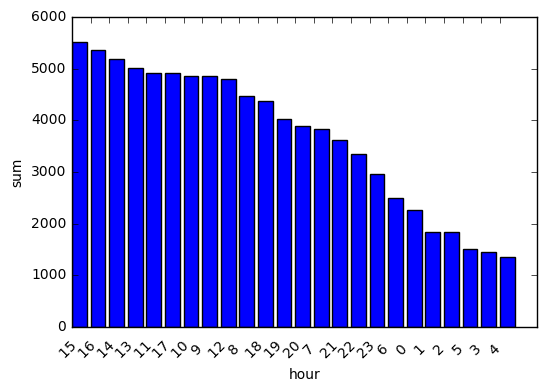

In [32]:
%matplotlib inline 

q1_results = _
q1_results.bar()
!echo 'Crime by Hour Distribution'

##### Now, this is is really odd isn't it?
Wouldn't you think most crimes happen at night in the dark? I know I would and I still do but the data shows quite the opposite. The top hours of crime are in the afternoon between the hours of 1:00 P.M - 4:00 P.M. at least that's the case in 2016.  

My take is, this is when people are in commute or still at work and gives the violators perfect opportunity to commit crimes, such as theft, etc. Something else you could do if you are really interested is run a subsequent query on what sort of establishment do these crimes take place in. Let's go ahead and do that as well. 

In [33]:
%%sql 
SELECT HOUR, PREMISE, OFFENSE_TYPE, NUMBER_OFFENSES
FROM Crime
WHERE HOUR BETWEEN '13' AND '16'
ORDER BY NUMBER_OFFENSES DESC
LIMIT 10;

10 rows affected.


hour,premise,offense_type,number_offenses
14,"Multi-Plex Home (Duplex,Triplex Etc.)",Aggravated Assault,8
15,Vehicle/Auto Sales/Lease/Auto Parts Store,Auto Theft,7
16,"Road, Street, or Sidewalk",Aggravated Assault,6
14,"Road, Street, or Sidewalk",Aggravated Assault,5
15,Rental Storage Facility,Burglary,5
15,Residence or House,Aggravated Assault,4
14,Commercial Parking Lot or Garage,Auto Theft,4
15,Residence or House,Aggravated Assault,4
16,"Road, Street, or Sidewalk",Aggravated Assault,4
15,"Road, Street, or Sidewalk",Aggravated Assault,4


It's diffuclt to group hours to get the premises beacuase the premises are all different for each record throughout the year. Instead, we can take a look at the most common places crimes took place between the hours of 1:00 P.M. and 4:00 P.M. It's no surpirse that Multi-pleax Home is at the top. Generally, apartment buildings / garages are the most common places for minor crimes. 

##### Question 5: What's the worst street to be on a holiday - (Let's say 4th of July)?

In [34]:
%%sql
SELECT DISTINCT STREETNAME, DATE, OFFENSE_TYPE, BEAT, NUMBER_OFFENSES
FROM Crime
WHERE DATE BETWEEN '2016-07-04 00:00:00' AND '2016-07-04 23:59:59'
ORDER BY NUMBER_OFFENSES DESC
LIMIT 10;

10 rows affected.


streetname,date,offense_type,beat,number_offenses
LARK,2016-07-04 00:00:00,Aggravated Assault,1.50E+31,8
FLAMINGO,2016-07-04 00:00:00,Aggravated Assault,14D30,3
ROBIN,2016-07-04 00:00:00,Murder,1A20,3
NORTHLINE,2016-07-04 00:00:00,Aggravated Assault,6B10,2
FONDREN,2016-07-04 00:00:00,Theft,1.70E+21,2
PARKER,2016-07-04 00:00:00,Auto Theft,8C60,2
AVENUE J,2016-07-04 00:00:00,Aggravated Assault,11H10,1
DOGWOOD TREE,2016-07-04 00:00:00,Aggravated Assault,6B50,1
WHITE CAP,2016-07-04 00:00:00,Burglary,19G20,1
BRITTWAY,2016-07-04 00:00:00,Burglary,4F30,1


In [35]:
%%sql
SELECT DISTINCT STREETNAME, NUMBER_OFFENSES
FROM Crime
WHERE DATE BETWEEN '2016-07-04 00:00:00' AND '2016-07-04 23:59:59'
ORDER BY NUMBER_OFFENSES DESC
LIMIT 10;

10 rows affected.


streetname,number_offenses
LARK,8
ROBIN,3
FLAMINGO,3
PARKER,2
NORTHLINE,2
FONDREN,2
TANNER PARK,1
SMALLWOOD,1
WESTMEAD,1
COLLINGSWORTH,1


July 4th Crime Location Distribution


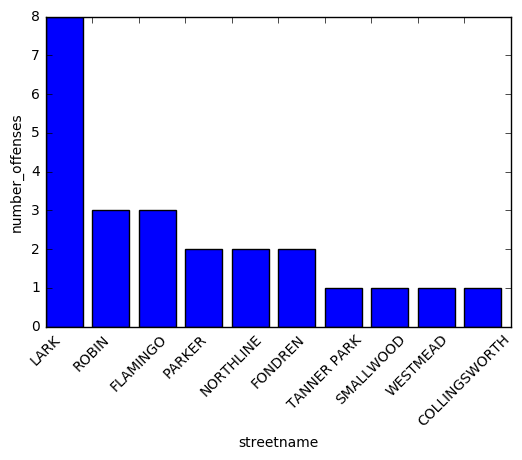

In [36]:
%matplotlib inline 

q1_results = _
q1_results.bar()
!echo 'July 4th Crime Location Distribution'

Well, if I am back in Houston during the 4th of July weekend, I will know what areas to avoid, most certainly, LARK ST. 
We can run similar queries on other holidays and observe. Perhaps we can see a pattern. That may be something for another project. Let's just run 1 more query and see if there is any overlap. 

In [37]:
%%sql
SELECT DISTINCT STREETNAME, NUMBER_OFFENSES
FROM Crime
WHERE DATE BETWEEN '2016-01-18 00:00:00' AND '2016-07-18 23:59:59'
ORDER BY NUMBER_OFFENSES DESC
LIMIT 10;

10 rows affected.


streetname,number_offenses
LARK,8
JEANETTA STRE,6
RECORD,6
FONDREN,6
FULTON,5
GRIGGS,5
COLLEGE,5
IDAHO,5
PARK VIEW,5
LOOP,5


MLK Day Crime Location Distribution


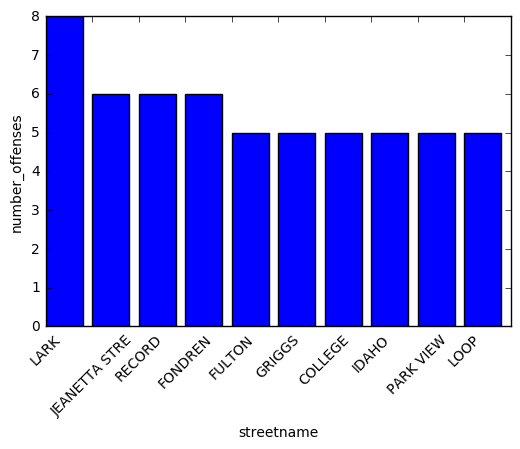

In [38]:
%matplotlib inline 

q1_results = _
q1_results.bar()
!echo 'MLK Day Crime Location Distribution'

And there is an overlap (LARK & FONDREN). Lark ST. tops the list again! 
##### AVOID LARK AT ALL COST!

##### Where are subqueries?
Let's explore what type of premises sees the most auto-theft in beat 24C60, which is the 2nd most common crime beat in Houston. 

In [39]:
%%sql
SELECT PREMISE, COUNT (*)
FROM Crime
WHERE HOUR in(
    SELECT HOUR
    FROM Crime
    WHERE OFFENSE_TYPE = 'Auto Theft'
    )
    AND BEAT = '24C60'
GROUP BY PREMISE
ORDER BY COUNT(*) DESC
LIMIT 10;

10 rows affected.


premise,count
Residence or House,40
Driveway,15
"Road, Street, or Sidewalk",9
Grocery Store or Supermarket Parking Lot,5
Construction Site,5
"Other, Unknown, or Not Listed",4
None,4
Grocery Store or Supermarket,4
"Vacant Single Occ Resd(House,Townhs,Dplex)",3
Miscellaneous Business (Non-Specific),3


Auto Theft Premise Distribution


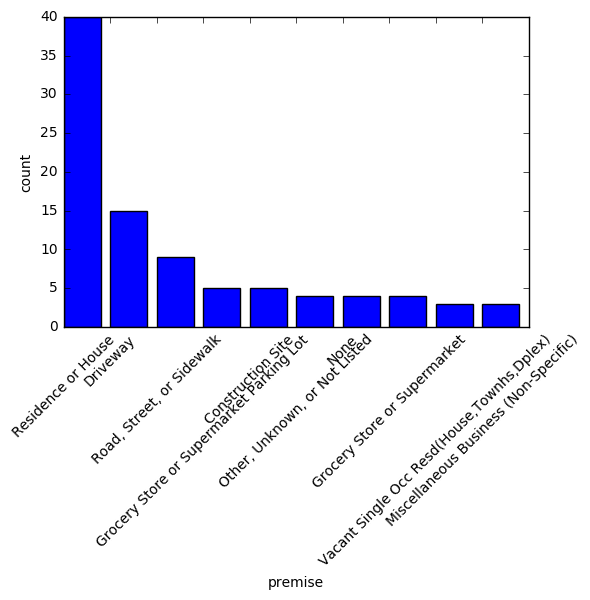

In [40]:
%matplotlib inline 

q1_results = _
q1_results.bar()
!echo 'Auto Theft Premise Distribution'

##### Updating NULL values
We only have 1 column that has any NULL values (Premise). You can find this in part 1 under csvstat commands. Before we set up our star schema, let's update those null values.

In [41]:
%%sql 
UPDATE Crime set PREMISE = 'n/a' WHERE PREMISE is null; 

942 rows affected.


[]

# Part 3 - (Setting up STAR SCHEMA)

That was fun and insightful. Even having lived there, I certainly learned a lot more theough this exploration. We need to make this more efficient, however. That's why we now move to star schema. Here we will make a schema. 

Why? 

1.Simpler queries

2.Faster performance (especially when we have a massive amount of data to sort through)

##### So how does our STAR SCHEMA look like?
Our Methodology:

> Our Fact table doesn't have any measurable content and that's mainly becuase we don't have any meaningful measurable column (eg: sales, profit, etc.). Instead, we have keys, which act as a faster pathway to accessing the data. Using keys we can measure any dimension. 
    
> We separated out the dimensions based on type. We have a few columns referring to address, which became the location dimension; few columns for date / time, which became the time dimension; and one for type of offense, which became the offense dimension. 
    
*See our illustration below

![StarSchema](https://raw.githubusercontent.com/bosea3000/Project-02/master/StarSchema.jpeg)

In [42]:
%%sql DROP TABLE IF EXISTS time;
CREATE TABLE time (
    date TIMESTAMP,
    hour CHAR(4)
    )

Done.
Done.


[]

##### Setting up Dimension table - Time

In [43]:
!csvcut -c1,2 crimeData.csv > time.csv

In [44]:
!csvcut -n time.csv

  1: Date
  2: Hour


In [45]:
%%sql
COPY time FROM '/home/jovyan/work/time.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

86769 rows affected.


[]

In [46]:
%%sql
SELECT * FROM time
LIMIT 5;

5 rows affected.


date,hour
2016-01-01 00:00:00,10
2016-01-01 00:00:00,23
2016-01-01 00:00:00,18
2016-01-01 00:00:00,18
2016-01-01 00:00:00,2


##### Our original data source does not contain unique values for each row. So we must alter the table to add an additional column of unique keys. 

In [47]:
%%sql 
ALTER TABLE time
ADD COLUMN time_key SERIAL PRIMARY
KEY;

Done.


[]

##### Sanity check 1.0

In [48]:
%%sql
SELECT * FROM time
LIMIT 5;

5 rows affected.


date,hour,time_key
2016-01-01 00:00:00,10,1
2016-01-01 00:00:00,23,2
2016-01-01 00:00:00,18,3
2016-01-01 00:00:00,18,4
2016-01-01 00:00:00,2,5


##### Setting up Dimension table - Offense

In [49]:
%%sql DROP TABLE IF EXISTS offense;
CREATE TABLE offense (
    offense_type VARCHAR(42),
    number_offenses INT
    )

Done.
Done.


[]

In [50]:
!csvcut -c3,10 crimeData.csv > offense.csv

In [51]:
%%sql
COPY offense FROM '/home/jovyan/work/offense.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

86769 rows affected.


[]

##### Our original data source does not contain unique values for each row. So we must alter the table to add an additional column of unique keys. 

In [52]:
%%sql 
ALTER TABLE offense
ADD COLUMN offense_key SERIAL PRIMARY
KEY;

Done.


[]

##### Quick sanity check 2.0

In [53]:
%%sql
SELECT * FROM offense
LIMIT 5;

5 rows affected.


offense_type,number_offenses,offense_key
Burglary,1,1
Theft,1,2
Aggravated Assault,2,3
Auto Theft,1,4
Burglary,1,5


##### Setting up Dimension table - Location

In [54]:
%%sql DROP TABLE IF EXISTS location;
CREATE TABLE location (
    Beat VARCHAR(20),
    Premise VARCHAR(64),
    BlockRange VARCHAR(20),
    StreetName VARCHAR(64)
    )

Done.
Done.


[]

In [55]:
!csvcut -c4,5,6,7 crimeData.csv > location.csv

In [56]:
%%sql
COPY location FROM '/home/jovyan/work/location.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

86769 rows affected.


[]

##### Our original data source does not contain unique values for each row. So we must alter the table to add an additional column of unique keys. 

In [57]:
%%sql 
ALTER TABLE location
ADD COLUMN location_key SERIAL PRIMARY
KEY;

Done.


[]

##### Quick sanity check 3.0

In [58]:
%%sql
SELECT * FROM location
LIMIT 5;

5 rows affected.


beat,premise,blockrange,streetname,location_key
10H10,Restaurant or Cafeteria,300-399,LOCKWOOD,1
10H30,"Road, Street, or Sidewalk",1000-1099,BASTROP,2
10H40,"Road, Street, or Sidewalk",1700-1799,ELGIN,3
10H40,Other Parking Lot,3000-3099,TRAVIS,4
10H40,Grocery Store or Supermarket,4200-4299,SAN JACINTO,5


##### Setting up Fact table - Facts

In [59]:
%%sql
DROP TABLE IF EXISTS facts;
CREATE TABLE facts (
    Crime_id SERIAL,
    offense_key SERIAL,
    time_key SERIAL,
    location_key SERIAL,
    FOREIGN KEY (offense_key) REFERENCES offense(offense_key),
    FOREIGN KEY (time_key) REFERENCES time(time_key),
    FOREIGN KEY (location_key) REFERENCES location(location_key)
    )

Done.
Done.


[]

In [60]:
%%sql INSERT INTO facts (Crime_id)
SELECT Crime_id
FROM Crime;

86769 rows affected.


[]

##### Final check

In [61]:
%%sql
SELECT * FROM facts
LIMIT 3;

3 rows affected.


crime_id,offense_key,time_key,location_key
1,1,1,1
2,2,2,2
3,3,3,3


## Problem 4

Let's take advantage of our newly acquired star schema and do some analysis!

In [62]:
%%sql
SELECT o.offense_type, COUNT(*)
FROM offense o, facts f
WHERE o.offense_key = f.offense_key
GROUP BY o.offense_type
ORDER BY COUNT
LIMIT 10;

8 rows affected.


offense_type,count
1,2
Murder,213
Rape,692
Robbery,7273
Aggravated Assault,7844
Auto Theft,8952
Burglary,13134
Theft,48659


It looks like most criminals in Houston are theives. 

In [63]:
%%sql 
SELECT t.hour, COUNT(*)
FROM time t, facts f
WHERE t.time_key = f.time_key
AND t.date BETWEEN '2016-06-01 00:00:00' AND '2016-09-01 00:00:00'
GROUP BY t.hour
ORDER BY COUNT
LIMIT 10;

10 rows affected.


hour,count
3,513
4,516
5,528
2,630
1,710
0,800
6,928
23,1065
21,1137
22,1177


You might remember that the afternoon is the worst time in Houston in terms of crime? Well, it's not the case during the summer months.  If you are spending your summer in Houston, stay away from the streets around 10 pm. At the same time, everything is nice and quiet at 3 in the morning. 

##### What is the worst place to be in Houston on an average day?

In [64]:
%%sql 
SELECT l.premise, COUNT(*)
FROM location l, facts f
WHERE l.location_key = f.location_key
GROUP BY l.premise
ORDER BY COUNT DESC
LIMIT 10;

10 rows affected.


premise,count
Residence or House,11945
Apartment Parking Lot,9961
"Road, Street, or Sidewalk",9083
Apartment,8318
Restaurant or Cafeteria Parking Lot,3927
Driveway,3434
Other Parking Lot,3083
Department or Discount Store,2923
Commercial Parking Lot or Garage,2241
Miscellaneous Business (Non-Specific),2238


<Container object of 10 artists>

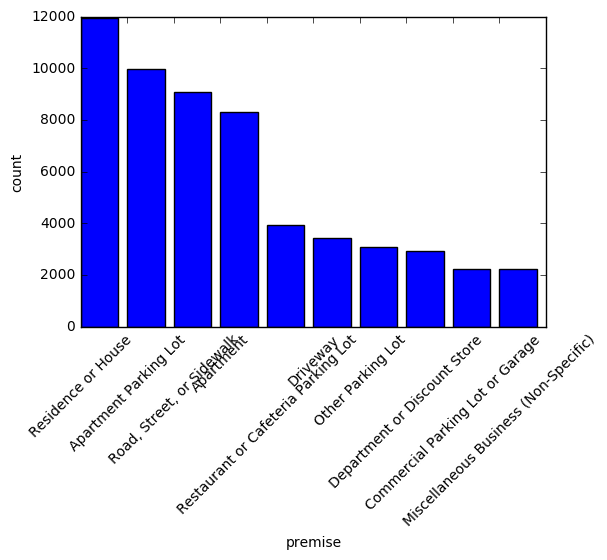

In [65]:
%matplotlib inline
result = _
result.bar()

In [66]:
%%sql 
SELECT l.premise, COUNT(*)
FROM location l, facts f
WHERE l.location_key = f.location_key
GROUP BY l.premise
ORDER BY COUNT ASC
LIMIT 10;

10 rows affected.


premise,count
Vacant Jail or Prison,1
"Marine Vehicle Sales, Boats, Sailboats",2
"Vacant Church, Synagogue, or Temple",2
Vacant Hospital,3
Video Rental & Sales,3
Credit Union,3
Vacant Government or Public Building,4
Vacant Industrial or Manufacturing Blding,5
Jail or Prison,6
Vacant School or College/University,8


<Container object of 10 artists>

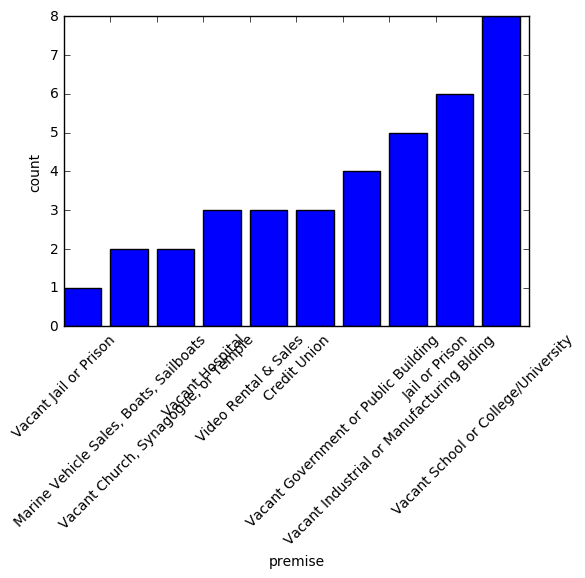

In [67]:
%matplotlib inline
result = _
result.bar()

Unfortunately, the least safe places in Houston are private residences. But if you are in jail or prison, you are as safe as a person can be!

##### What was the worst day in terms of crime in Houston in the last months?

In [68]:
%%sql 
SELECT t.date, COUNT(*)
FROM time t, facts f
WHERE t.date IN
    (SELECT date FROM time)
AND t.time_key = f.time_key
GROUP BY t.date
ORDER BY COUNT DESC
LIMIT 10;

10 rows affected.


date,count
2016-05-18 00:00:00,395
2016-09-15 00:00:00,392
2016-06-21 00:00:00,386
2016-09-02 00:00:00,385
2016-04-15 00:00:00,384
2016-09-07 00:00:00,379
2016-05-02 00:00:00,378
2016-06-06 00:00:00,377
2016-08-08 00:00:00,376
2016-08-01 00:00:00,375


May the 18th 2016 was an awful day with 395 offenses taking place! On average that's more than 16 every hour!

# Option A - Automating ETL

* **Can we fully automate the process of ETL for the this particular data set?**
    * No, we cannot! 
    * Firstly, the website requires authentication to proceed, which would require a human clicking and agreeing to their terms. 
    * Seconly the files are available in either access or xls and not csv format. Although, you can use in2csv command to automate that process.
    * Then, we run into the issue that each month's data actually contains random data from other months and even some other years such as 85,87, etc. So there is cleanup involved. We can use 'grep' command to get rid of anything but 2016 results byt that still leaves you with overalping months entries. Ideally, human intervention is required.
    * Lastly the separate files need to be combined into one. This can certainly be automated. In fact, we used this process (see part 1 introduction). 
    

* **How often will this need to be updated?**
    * Monthly. Upon release of monthly crime data by the city of Houston. 
  

* **Easily Automate-able steps:**
    * File conversion (in2csv)
    * File merge
    * Upate NULL values
    * Fill Tables with values
    
    
* **Possible issues:** 
    * Data Quality! - While going through the file we a few improper entries, although for the most part our data was very clean. The improper entries included dates in number of offenses column, and integer in offense type column. This will create errors when loading into data table without manipulation. 
    * The way we dealt with it was by manaully changing the imporper entries. In our case, that was 11 rows, so not that many but that's not to say in consequent months that number can't increase. 

# Attestation

Akash: Worked on Parts 1, 2, Bonus (Option A) + Comments, Markdowns and clean-up for the entire project.

Dmitry: Worked on Parts 3, 4, Markdowns for parts 3 and 4